In [1]:
import antpodTest as apd

In [17]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon
import matplotlib.pyplot as plt 
import keplergl
import rasterstats
%matplotlib inline

In [3]:
geo = gpd.read_file("S:\\antpodGIS\\geojson\\FarmKanchi.geojson")
geo.head()

,id,geometry
0,1,"MULTIPOLYGON (((80.06658 12.82279, 80.07059 12..."


In [4]:
userID = "APX00000"
mapConfig = "XX"
sensor = ["L2A", "L1C"]
antpodProduct =  "VXX"
VXXProducts =['NDVI', 'SAVI', 'AVI', 'EVI', 'ARVI', 'GNDVI', 'NDCI', 'NPCRI', 'PSRI', 'BSI', 'NDMI', 'NDWI', 'SI']
files = apd.rasterCaller(userID, mapConfig, sensor, antpodProduct)
files
#tiff = rio.open("S:\\antpodGIS\\tiff\\APX00000-XX-L2A-VXX-2020-02-15.tif")

['APX00000-XX-L2A-VXX-2020-01-01.tif',
 'APX00000-XX-L2A-VXX-2020-01-06.tif',
 'APX00000-XX-L2A-VXX-2020-01-11.tif',
 'APX00000-XX-L2A-VXX-2020-01-16.tif',
 'APX00000-XX-L2A-VXX-2020-01-21.tif',
 'APX00000-XX-L2A-VXX-2020-01-26.tif',
 'APX00000-XX-L2A-VXX-2020-01-31.tif',
 'APX00000-XX-L2A-VXX-2020-02-05.tif',
 'APX00000-XX-L2A-VXX-2020-02-10.tif',
 'APX00000-XX-L2A-VXX-2020-02-15.tif',
 'APX00000-XX-L2A-VXX-2020-02-20.tif',
 'APX00000-XX-L2A-VXX-2020-02-25.tif',
 'APX00000-XX-L2A-VXX-2020-03-01.tif',
 'APX00000-XX-L2A-VXX-2020-03-06.tif',
 'APX00000-XX-L2A-VXX-2020-03-11.tif',
 'APX00000-XX-L2A-VXX-2020-03-16.tif',
 'APX00000-XX-L2A-VXX-2020-03-21.tif',
 'APX00000-XX-L2A-VXX-2020-03-26.tif',
 'APX00000-XX-L2A-VXX-2020-03-31.tif',
 'APX00000-XX-L2A-VXX-2020-04-05.tif',
 'APX00000-XX-L2A-VXX-2020-04-10.tif',
 'APX00000-XX-L2A-VXX-2020-04-15.tif',
 'APX00000-XX-L2A-VXX-2020-04-20.tif',
 'APX00000-XX-L2A-VXX-2020-04-25.tif',
 'APX00000-XX-L2A-VXX-2020-04-30.tif',
 'APX00000-XX-L2A-VXX-202

In [5]:
meta = apd.openRaster(files,antpodProduct)
meta

{'2020-01-01': <open DatasetReader name='APX00000-XX-L2A-VXX-2020-01-01.tif' mode='r'>,
 '2020-01-06': <open DatasetReader name='APX00000-XX-L2A-VXX-2020-01-06.tif' mode='r'>,
 '2020-01-11': <open DatasetReader name='APX00000-XX-L2A-VXX-2020-01-11.tif' mode='r'>,
 '2020-01-16': <open DatasetReader name='APX00000-XX-L2A-VXX-2020-01-16.tif' mode='r'>,
 '2020-01-21': <open DatasetReader name='APX00000-XX-L2A-VXX-2020-01-21.tif' mode='r'>,
 '2020-01-26': <open DatasetReader name='APX00000-XX-L2A-VXX-2020-01-26.tif' mode='r'>,
 '2020-01-31': <open DatasetReader name='APX00000-XX-L2A-VXX-2020-01-31.tif' mode='r'>,
 '2020-02-05': <open DatasetReader name='APX00000-XX-L2A-VXX-2020-02-05.tif' mode='r'>,
 '2020-02-10': <open DatasetReader name='APX00000-XX-L2A-VXX-2020-02-10.tif' mode='r'>,
 '2020-02-15': <open DatasetReader name='APX00000-XX-L2A-VXX-2020-02-15.tif' mode='r'>,
 '2020-02-20': <open DatasetReader name='APX00000-XX-L2A-VXX-2020-02-20.tif' mode='r'>,
 '2020-02-25': <open DatasetRead

In [6]:
grid = apd.createGrid(geo)

c:\users\prkaa\anaconda3\envs\play\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [7]:
grid.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
geodf = apd.overlayGrid(grid,geo)
geodf.dropna()

S:\antpodGIS\antpodTest.py:265: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  geodf = gpd.overlay(grid, geo)


,id,geometry
0,1,"POLYGON ((80.06210 12.81309, 80.06210 12.81279..."
1,1,"POLYGON ((80.06160 12.81279, 80.06210 12.81279..."
2,1,"POLYGON ((80.06160 12.81229, 80.06210 12.81229..."
3,1,"POLYGON ((80.06160 12.81179, 80.06210 12.81179..."
4,1,"POLYGON ((80.06160 12.81129, 80.06210 12.81129..."
...,...,...
891,1,"POLYGON ((80.07660 12.81929, 80.07697 12.81929..."
892,1,"POLYGON ((80.07660 12.81879, 80.07694 12.81879..."
893,1,"POLYGON ((80.07660 12.81829, 80.07678 12.81829..."
894,1,"POLYGON ((80.07713 12.82179, 80.07710 12.82179..."


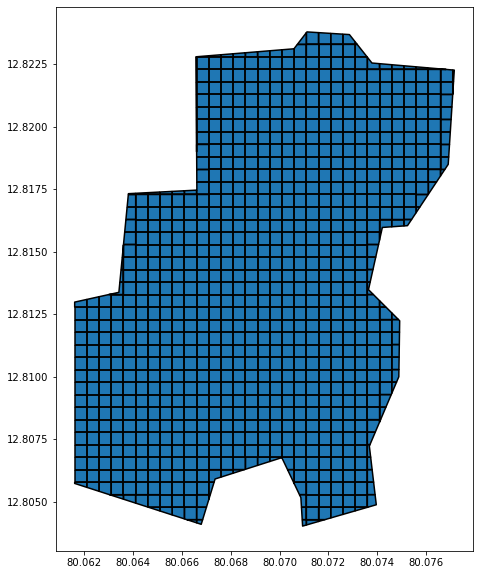

In [14]:
geodf.plot(figsize = (10,10))
geodf.boundary.plot(ax=plt.gca(),color='k')

In [15]:
dates = apd.extractDates(meta)
dates

['2020-01-01',
 '2020-01-06',
 '2020-01-11',
 '2020-01-16',
 '2020-01-21',
 '2020-01-26',
 '2020-01-31',
 '2020-02-05',
 '2020-02-10',
 '2020-02-15',
 '2020-02-20',
 '2020-02-25',
 '2020-03-01',
 '2020-03-06',
 '2020-03-11',
 '2020-03-16',
 '2020-03-21',
 '2020-03-26',
 '2020-03-31',
 '2020-04-05',
 '2020-04-10',
 '2020-04-15',
 '2020-04-20',
 '2020-04-25',
 '2020-04-30',
 '2020-05-05',
 '2020-05-10',
 '2020-05-15',
 '2020-05-20',
 '2020-05-25',
 '2020-05-30',
 '2020-06-04',
 '2020-06-09',
 '2020-06-14',
 '2020-06-19',
 '2020-06-24',
 '2020-06-29',
 '2020-07-04']

In [29]:
for date in dates:
    i=0
    x = meta[date].read(1)
    stats = rasterstats.zonal_stats(geodf.geometry, apd.retClipGeoData(meta[date], geodf, 1),
                                        affine=apd.retTransform(meta[date], geodf))
    for stat in stats:
        geodf.loc[i, date] = stat['mean']
        i = i+1
    i=0
geodf.head()

c:\users\prkaa\anaconda3\envs\play\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


,id,geometry,2020-01-01,2020-01-06,2020-01-11,2020-01-16,2020-01-21,2020-01-26,2020-01-31,2020-02-05,...,2020-05-20,2020-05-25,2020-05-30,2020-06-04,2020-06-09,2020-06-14,2020-06-19,2020-06-24,2020-06-29,2020-07-04
0,1,"POLYGON ((80.06210 12.81309, 80.06210 12.81279...",-0.021430,0.586341,0.543111,0.582211,0.587528,0.573908,0.508362,0.541822,...,0.211339,0.296098,0.300099,0.303697,0.068296,0.325700,0.339670,0.367623,0.036878,0.056575
1,1,"POLYGON ((80.06160 12.81279, 80.06210 12.81279...",-0.028675,0.658985,0.611735,0.672761,0.669858,0.678179,0.581793,0.644221,...,0.240128,0.395425,0.411297,0.489757,0.066127,0.489912,0.461674,0.548342,0.038996,0.054317
2,1,"POLYGON ((80.06160 12.81229, 80.06210 12.81229...",-0.016794,0.719659,0.676276,0.734071,0.720265,0.731913,0.630599,0.708150,...,0.266034,0.457561,0.485666,0.572853,0.063792,0.578474,0.554957,0.629079,0.039120,0.054982
3,1,"POLYGON ((80.06160 12.81179, 80.06210 12.81179...",-0.017256,0.769298,0.728123,0.779317,0.781197,0.753041,0.642808,0.687153,...,0.268734,0.422992,0.448405,0.469807,0.065500,0.477838,0.484644,0.505525,0.038950,0.059261
4,1,"POLYGON ((80.06160 12.81129, 80.06210 12.81129...",-0.007227,0.763692,0.722699,0.774995,0.748114,0.764318,0.632619,0.696233,...,0.246684,0.319927,0.404885,0.461120,0.066251,0.468845,0.424638,0.537069,0.039158,0.058265


In [30]:
geodf.describe()

,id,2020-01-01,2020-01-06,2020-01-11,2020-01-16,2020-01-21,2020-01-26,2020-01-31,2020-02-05,2020-02-10,...,2020-05-20,2020-05-25,2020-05-30,2020-06-04,2020-06-09,2020-06-14,2020-06-19,2020-06-24,2020-06-29,2020-07-04
count,896.0,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,...,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,1.0,-0.024921,0.410616,0.402526,0.548536,0.506907,0.595152,0.406057,0.629422,0.262120,...,0.193844,0.131615,0.283386,0.316711,0.064263,0.367647,0.383186,0.456931,0.036149,0.041294
std,0.0,0.021744,0.157229,0.151744,0.127579,0.172124,0.133901,0.176574,0.164895,0.195049,...,0.031605,0.112722,0.094524,0.138895,0.001180,0.153951,0.154279,0.169422,0.002388,0.011719
min,1.0,-0.155071,0.009875,0.050707,0.072428,-0.041061,0.004840,0.040736,0.073815,-0.035777,...,0.120620,-0.038774,0.063967,-0.006172,0.059298,-0.006995,0.014803,0.000683,0.027736,0.020704
25%,1.0,-0.037175,0.285183,0.302142,0.467788,0.405441,0.511056,0.267224,0.515532,0.042492,...,0.169556,0.039601,0.212628,0.207424,0.063565,0.240852,0.258485,0.321918,0.034732,0.031259
50%,1.0,-0.025138,0.402340,0.411070,0.563446,0.538555,0.615528,0.429501,0.655110,0.287248,...,0.187240,0.110715,0.268840,0.286536,0.064274,0.334975,0.360172,0.435249,0.036396,0.038834
75%,1.0,-0.012510,0.527591,0.513854,0.639266,0.635849,0.699046,0.553185,0.769226,0.429815,...,0.211807,0.195923,0.335508,0.401940,0.064947,0.477374,0.491012,0.588399,0.037837,0.051504
max,1.0,0.057820,0.769298,0.731987,0.824160,0.844964,0.863583,0.758893,0.899876,0.634790,...,0.309374,0.551992,0.647979,0.800795,0.068296,0.806094,0.801518,0.864850,0.041416,0.064915


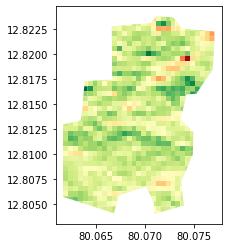

In [34]:
geodf.plot('2020-01-01', cmap='RdYlGn')

In [ ]:
apd.showRaster

In [2]:
from keplergl import KeplerGl as k

In [9]:
map1 = k(height=500)
map1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=500)

In [6]:
import geopandas as gpd

geodf = gpd.read_file("S:\EyesInTheSky\exports\GeoDFL2AVXX2020-01-06.tif.geojson")
geodf.head()

,antpod,meanNDVI,meanSAVI,meanAVI,meanEVI,meanARVI,meanGNDVI,meanNDCI,meanNPCRI,meanPSRI,meanBSI,meanNDMI,meanNDWI,meanSI,geometry
0,APX00001-01,0.650310,0.928503,NaN,2.440292,0.649799,0.548880,0.331499,0.041497,0.019290,-0.112761,0.148355,-0.548880,None,"POLYGON ((80.05701 12.80345, 80.05701 12.80320..."
1,APX00001-01,0.632274,0.902752,NaN,2.546360,0.631604,0.547697,0.318631,0.027838,0.019181,-0.110474,0.145157,-0.547697,None,"POLYGON ((80.05698 12.80320, 80.05701 12.80320..."
2,APX00001-01,0.538937,0.769475,NaN,2.043136,0.537301,0.482521,0.263493,0.075032,0.047166,-0.051167,0.089326,-0.482521,None,"POLYGON ((80.05690 12.80270, 80.05701 12.80270..."
3,APX00001-01,0.662394,0.945755,NaN,2.850589,0.662326,0.567773,0.346400,0.001937,0.001455,-0.115565,0.142772,-0.567773,None,"POLYGON ((80.05683 12.80220, 80.05701 12.80220..."
4,APX00001-01,0.641007,0.915216,NaN,2.804407,0.640863,0.550188,0.326062,0.009174,0.004816,-0.089096,0.112847,-0.550188,None,"POLYGON ((80.05676 12.80170, 80.05701 12.80170..."


In [11]:
map1.add_data(data=geodf, name='geoDataFrame')

c:\users\prkaa\anaconda3\envs\play\lib\site-packages\geopandas\geodataframe.py:852: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")
